In [1]:
import sqlite3
from datetime import datetime
from Occupation import Occupation
import json 
from pprint import pprint
from matplotlib import pyplot as plt
from get_page_length_subset_indices import get_subset_indices
from plot_page_statistics import plot_page_stats
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from bin_revision_history import month_bin_revisions
from count_contributions import contributions_by_user
from statistics import median, mean, stdev
%matplotlib widget

plt.rcParams['figure.dpi'] = 120

C:\Users\leond\Documents\Github\csh\data\data_bases\aggregated_edits.db
{'Chief executive officer': {datetime.datetime(2002, 5, 1, 0, 0): [{'revid': 72571, 'parentid': 0, 'minor': '', 'user': 'Roadrunner', 'userid': 1411, 'timestamp': '2002-05-17T00:18:24', 'size': 115, 'tags': []}, {'revid': 72572, 'parentid': 72571, 'user': 'The Anome', 'userid': 76, 'timestamp': '2002-05-19T03:59:45', 'size': 523, 'tags': []}, {'revid': 894295, 'parentid': 72572, 'user': 'The Anome', 'userid': 76, 'timestamp': '2002-05-19T04:00:34', 'size': 554, 'tags': []}], datetime.datetime(2003, 5, 1, 0, 0): [{'revid': 921290, 'parentid': 894295, 'user': 'Minesweeper', 'userid': 7279, 'timestamp': '2003-05-06T04:27:06', 'size': 1048, 'tags': []}, {'revid': 1192451, 'parentid': 921290, 'minor': '', 'user': 'WeißNix', 'userid': 8004, 'timestamp': '2003-05-14T21:39:42', 'size': 1062, 'tags': []}], datetime.datetime(2003, 7, 1, 0, 0): [{'revid': 1328588, 'parentid': 1192451, 'minor': '', 'user': 'Thseamon', 'userid'

In [2]:
def plot_page(occ): # for plotting diff, edits, A, employments
    
    print("lenient links:")
    pprint(occ.lenient_links)
    
    print("\n")
    print("\n")
    
    print("strict links:")
    pprint(occ.strict_links)
    plot_page_stats(occ)

### Getting the occupation-row from the database

In [3]:
db_path = r"C:\Users\leond\Documents\Github\csh\data\data_bases\aggregated_edits.db"

con = sqlite3.connect(db_path)
cur = con.cursor()
cur.execute(f"Select * from occupations Where id = 15") # insert ID
occupations = cur.fetchall()
print(occupations[0][2])

Accountants and Auditors


### Wikipedia site

In [4]:
occ = Occupation(*occupations[0])

wiki_site_name = "Auditor" # name of a given Wiki link (not the SOC profession itself!)
wiki_site = month_bin_revisions(occ.lenient_revisions)[wiki_site_name]

### Getting unique users per year

In [5]:
def get_unique_year(year): # function that gets the unique site editors in a year
    contribs_year = []
    for date, number_edits in occ.lenient_binned_edits[wiki_site_name].items():
        if year == date.year:
            contribs_year.append(contributions_by_user(wiki_site[date]))
    unique_contribs = len(set([item[0] for sublist in contribs_year for item in sublist]))
    return unique_contribs

In [6]:
# unique_contribs_per_year

In [7]:
year = (next(iter(occ.lenient_binned_edits[wiki_site_name]))).year # first year in the dict
unique_contribs_per_year = []

while get_unique_year(year) != 0 or year < (list(occ.lenient_binned_edits[wiki_site_name])[-1]).year:
    unique_contribs_per_year.append([year, get_unique_year(year)])
    year += 1
    
unique_contribs_per_year

[[2004, 1],
 [2005, 0],
 [2006, 0],
 [2007, 0],
 [2008, 0],
 [2009, 0],
 [2010, 0],
 [2011, 0],
 [2012, 0],
 [2013, 0],
 [2014, 0],
 [2015, 14],
 [2016, 6],
 [2017, 3],
 [2018, 5],
 [2019, 5],
 [2020, 3],
 [2021, 4],
 [2022, 1]]

### Plotting the unique edits per year

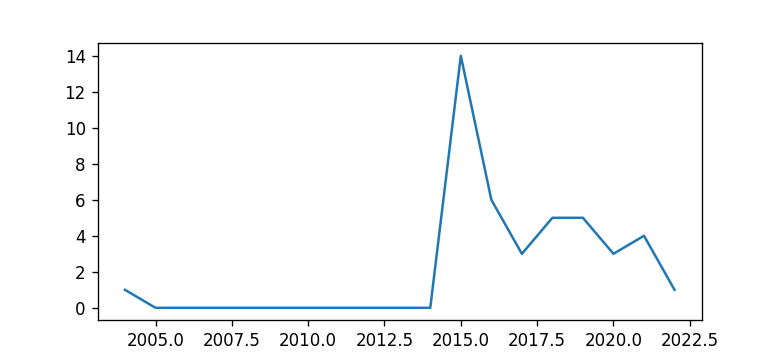

In [8]:
f = plt.figure()
f.set_figwidth(6.5)
f.set_figheight(3)

year = [item[0] for item in unique_contribs_per_year]
unique_contr = [item[1] for item in unique_contribs_per_year]

plt.plot(year, unique_contr)
plt.show()

### Plotting the job market data

lenient links:
[['Accountant', 'http://en.wikipedia.org/?curid=58216'],
 ['Auditor', 'http://en.wikipedia.org/?curid=552416']]




strict links:
[['Accountant', 'http://en.wikipedia.org/?curid=58216'],
 ['Auditor', 'http://en.wikipedia.org/?curid=552416']]


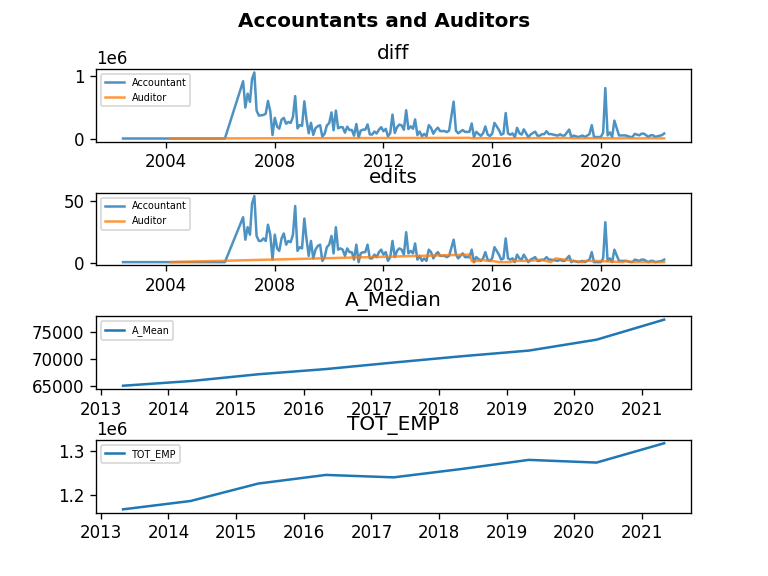

In [9]:
plot_page(occ)